<a href="https://colab.research.google.com/github/LucasGleysson/Amostragem/blob/master/Amostragens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##População e Amostragem

##População
Todo o conjunto de registros




#Amostra
Parte da população.

- A amostra é sempre menor que a população.
- Trabalhar com amostras é mais rápido no processamento e demanda menos tempo para analisar.
- Da amostra, se é possível obter estatísticas sobre a população.
- A amostra deve ser **Randômica** e **Representativa**.


#Tipos de amostragem


##Metodos não Probabilisticos

- Não tem chances iguais de seleção
- Risco de não assistir a representatividade.
- Usada em estudos de campo

***Convêniencia***: Seleciona os registros que estão disponiveis naquele momento ou pessoas que se voluntariaram para a amostra.

***Quota***: Baseada em caracteristicas, como por exemplo, selecionar apenas pessoas que passam por uma rua específica. Leva ao risco de da não representatividade.

***Julgamento***: Onde se acha que determinada pessoa é a melhor para fazer parte da amostra.

***Snowball***: Alguém da amostra indica outra pessoa para fazer parte da amostra. Usada para encontrar pessoas de grupos específicos que são difíceis de se encontrar.




##Metodos Probabilisticos

- Chances iguais de seleção
- Maior chance de conseguir a representatividade
- Focados para a analise de dados.

Vamos ver abaixo alguns metodos de amostragem e como eles funcionam utilizando um dataset de censo norte americano com alguns dados sobre a renda de uma pessoa.

##Visualização dos dados

In [15]:
import random
import pandas as pd
import numpy as np

dataset = pd.read_csv('census.csv')
display(dataset.head(5))
display(dataset.shape)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 15)

##Tratamento

In [16]:
colunas = ["age", "education", "education-num", "occupation", "sex", "hour-per-week", "native-country", "income"]
dataset = dataset.loc[:, colunas]
dataset.head()

,age,education,education-num,occupation,sex,hour-per-week,native-country,income
0,39,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K
1,50,Bachelors,13,Exec-managerial,Male,13,United-States,<=50K
2,38,HS-grad,9,Handlers-cleaners,Male,40,United-States,<=50K
3,53,11th,7,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Bachelors,13,Prof-specialty,Female,40,Cuba,<=50K


##Amostragem aleatória simples

Seleciona aleatóriamente os elementos de uma base de dados.


In [17]:
# 'sample' é um metodo do pandas que resgata aleatoriamente a quantidade
# de amostras que for passado.
def amostragem_aleatoria_simples(dataset, qnt_amostra):
  amostras = dataset.sample(n = qnt_amostra, replace = False, random_state=42)
  return amostras

amostra_simples = amostragem_aleatoria_simples(dataset, 100)
display(amostra_simples.head(5))
display(amostra_simples.shape)

,age,education,education-num,occupation,sex,hour-per-week,native-country,income
14160,27,Some-college,10,Adm-clerical,Female,38,United-States,<=50K
27048,45,HS-grad,9,Exec-managerial,Female,40,United-States,<=50K
28868,29,Bachelors,13,Exec-managerial,Male,55,United-States,>50K
5667,30,Bachelors,13,Machine-op-inspct,Female,40,United-States,<=50K
7827,29,Some-college,10,Craft-repair,Male,50,United-States,<=50K


(100, 8)

###Quando Usar?
Esse metodo pode ser utilizado em diversas situações em que não exista um pre requisito para a seleção das amostras, o que que faz com que ela seja um dos elementos fundamentais de uma análise. Alguns exemplos são na seleção de itens para controle de qualidade ou seleção de clientes para um feedback.



##Amostragem Sistemática.

Seleciona as amostras usando um sistema que gera uma sequencia de números que vão depender do primeiro termo, gerado aleatóriamente e um intervalo, que é o resultado da divisão entre os tamanhos da população e da amostra.  No exemplo exemplo, o intervalo é 269, que é resultado da população dividido pela quantidade da amostra que se quer. É selecionado um dos dos registros aleatoriamente entre 1 e 269 e os outros elementos da amostra serão contados de 269 em 269.

EX:
primeiro registro selecionado aleatoriamente: 57

57  + 269 = 353

353 + 269 = 649...

In [18]:
# 1. Se divide o tamanho da população pela quantidade da amostra para obter um
#    intervalor.

# 2. Seleciona um número aleatoriamente entre 0  e o valor do intervalo.

# 3. Iniciando do número aleatório, a sequencia segue tendo como passo o
#    intervalo.

# random.seed(42)

def amostragem_sistematica(dataset, qnt_amostra):
  intervalo = round(dataset.shape[0] / qnt_amostra)
  inicio= random.randint(1, intervalo)
  indices = np.arange(inicio, len(dataset), step = intervalo)
  amostra = dataset.iloc[indices]
  return amostra

amostra_sistematica = amostragem_sistematica(dataset, 110)
display(amostra_sistematica.head(4))
display(amostra_sistematica.shape)

,age,education,education-num,occupation,sex,hour-per-week,native-country,income
105,32,HS-grad,9,Craft-repair,Male,40,United-States,>50K
401,28,Some-college,10,Other-service,Female,40,United-States,<=50K
697,31,Masters,14,Tech-support,Male,40,United-States,>50K
993,47,HS-grad,9,Adm-clerical,Male,50,United-States,>50K


(110, 8)

###Quando usar?
A amostragem sistemática pode ser utilizada quandoa base de dados tem algum tipo de ordem, padrão, sequência ou quando se quer que a base tenha esse tipo de padrão. Pode ser aplicada em analises periodicas de vendas ou em Estudos de mercado, utilizando um sistema para selecionar aleatoriamente participantes em intervalos regulares.

##Amostragem por Grupos

Se divide a base de dados em vários grupos, e então usamos uma seleção aleatória simples para escolher qual grupo será pego como amostra. A amostra será todos os registros dentro daquele grupo.


In [19]:
def amostragem_por_grupos(dataset, qnt_grupos):
  dataset = dataset.copy()
  qnt_amostra = dataset.shape[0] / qnt_grupos
  grupos = []
  id_grupo = 1
  contador = 0

  # Definindo os grupos
  for _ in dataset.iterrows():
    grupos.append(id_grupo)
    contador += 1
    if contador > qnt_amostra:
      contador = 0
      id_grupo += 1

  # Inserindo os grupos
  dataset['grupo'] = grupos

  #Escolhendo o grupo
  amostra = dataset[dataset['grupo'] == random.randint(1, qnt_grupos)]

  return amostra

In [20]:
amostra_de_grupo = amostragem_por_grupos(dataset, 100)
display(amostra_de_grupo.head(5))
display(amostra_de_grupo.tail(5))
display(amostra_de_grupo.shape)

,age,education,education-num,occupation,sex,hour-per-week,native-country,income,grupo
5542,40,Assoc-acdm,12,Exec-managerial,Female,40,United-States,>50K,18
5543,44,Masters,14,Exec-managerial,Male,40,United-States,>50K,18
5544,33,Assoc-acdm,12,Protective-serv,Male,56,United-States,<=50K,18
5545,21,Some-college,10,Adm-clerical,Male,40,United-States,<=50K,18
5546,35,Bachelors,13,Other-service,Female,60,United-States,<=50K,18


,age,education,education-num,occupation,sex,hour-per-week,native-country,income,grupo
5863,64,Masters,14,Prof-specialty,Female,35,United-States,<=50K,18
5864,48,Some-college,10,Transport-moving,Male,53,United-States,<=50K,18
5865,24,Bachelors,13,Prof-specialty,Female,40,United-States,<=50K,18
5866,51,HS-grad,9,Farming-fishing,Male,60,United-States,<=50K,18
5867,25,Bachelors,13,Craft-repair,Male,60,United-States,>50K,18


(326, 9)

### Quando usar?
Esse tipo de amostragem é comum no estudo da geologia, onde se divide um terreno em grupos e então é feito um estudo em apenas uma parte daquele terreno. Outas aplicações são em pesquisas de saude publica onde é selecionado as amostras por grupos demograficas e estudo de satifação de funcionários.

##Amostra Estratificada
Método que tenta ter uma amostra mais representativa da população, escolhendo uma caracteristica que divide a população em grupos e então se tira uma amostra proporcional ao tamanho daqueles grupo. Para isso é necessário selecionar o grupo que deve ser bem representado e nesse caso, selecionamos a coluna "income".

In [21]:
def amostragem_estratificada(dataset, qnt_amostra, gp_divisor):
  from sklearn.model_selection import StratifiedShuffleSplit

  # Configura o tamanho da amostra que será separada
  qnt_amostra = qnt_amostra / len(dataset) # converte a quantidade para uma fração do dataset (porcentagem)
  split = StratifiedShuffleSplit(test_size = qnt_amostra)

  # Faz a separação da amaostra de forma estratificada
  for _, y in split.split(dataset,dataset[gp_divisor]):
    df_y = dataset.iloc[y]

  amostra = df_y
  return amostra

amostra_estratificada = amostragem_estratificada(dataset, 100, 'income')
display(amostra_estratificada.head(10))
display(amostra_estratificada.shape)

,age,education,education-num,occupation,sex,hour-per-week,native-country,income
14331,36,HS-grad,9,Sales,Female,40,United-States,<=50K
18697,60,Some-college,10,Craft-repair,Male,40,United-States,<=50K
27068,41,Bachelors,13,Machine-op-inspct,Male,40,?,<=50K
28998,28,HS-grad,9,Craft-repair,Male,45,United-States,<=50K
8305,58,9th,5,Other-service,Female,40,United-States,<=50K
19699,44,Bachelors,13,Exec-managerial,Male,70,United-States,>50K
4121,49,HS-grad,9,Adm-clerical,Male,40,United-States,>50K
5592,30,Some-college,10,Sales,Male,40,South,<=50K
32534,37,Some-college,10,Adm-clerical,Female,39,United-States,<=50K
5452,28,Bachelors,13,Adm-clerical,Female,16,El-Salvador,<=50K


(100, 8)

Vamos comparar para ver se a distribuição de renda que existe na população foi bem representada na amostra.

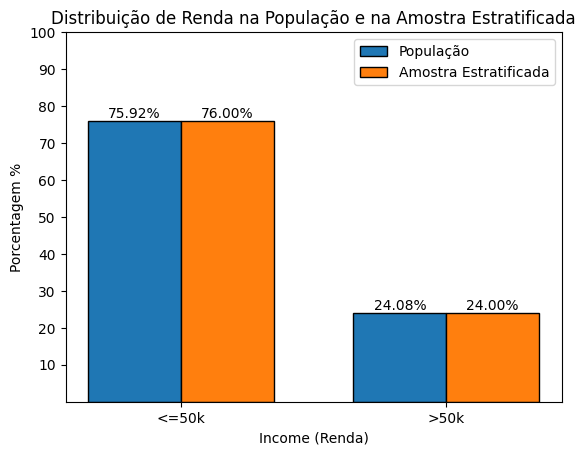

In [22]:
import matplotlib.pyplot as plt

# Dados da população
populacao_labels = ['<=50k', '>50k']
porcentagem_50k = (dataset['income'].value_counts()[0] / len(dataset)) * 100
porcentagem_mais_50k = (dataset['income'].value_counts()[1] / len(dataset)) * 100
populacao_percentuais = [porcentagem_50k, porcentagem_mais_50k]

# Dados da amostra estratificada
amostra_labels = ['<=50k', '>50k']
percentual_amostra_50k = amostra_estratificada['income'].value_counts()[0]
percentual_amostra_mais_50k = amostra_estratificada['income'].value_counts()[1]
amostra_percentuais = [percentual_amostra_50k, percentual_amostra_mais_50k]

# Configuração do gráfico
bar_width = 0.35
index = range(len(populacao_labels))

# Criando o gráfico

fig, ax = plt.subplots()
bars1 = ax.bar(index, populacao_percentuais, bar_width, label='População', edgecolor='black')
bars2 = ax.bar([i + bar_width for i in index], amostra_percentuais, bar_width, label='Amostra Estratificada', edgecolor='black')

# Adicionando as porcentagens no topo das barras
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.text(bar1.get_x() + bar1.get_width() / 2., height1, f'{height1:.2f}%', ha='center', va='bottom')
    ax.text(bar2.get_x() + bar2.get_width() / 2., height2, f'{height2:.2f}%', ha='center', va='bottom')

# Adicionando as legendas
plt.yticks(range(10, 101, 10))
ax.set_xlabel('Income (Renda)')
ax.set_ylabel('Porcentagem %')
ax.set_title('Distribuição de Renda na População e na Amostra Estratificada')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(populacao_labels)
ax.legend()




# Mostrando o gráfico

plt.show()



###Quando usar?
Esse metodo também é util em pesquisas de mercado regionais e até fazer previsões de vendas, fazendo com que o modelo leve em consideração as regiões onde as lojas estão distribuidas e o desempenho em cada lugar.

##Amostra de Reservatório

Metodo mais comum quando se trabalha com *data stream* de itens, com tamanho desconhecido e que podem ser acessados somente uma vez.
Data stream são dados continuos, que estão sempre cehgando ou sendo atualizados, como dados de web ou e-commerce.

O algoritmo deve sortear itens do stream, mas todos devem ter a mesma chance de serem selecionados.

In [23]:
def amostragem_reservatorio(dataset, qnt_amostra):

  stream = []

  # SIMULADOR DE DATA STREAM
  for i in range(len(dataset)):
    stream.append(i)

  reservatorio = [0] * qnt_amostra
  for i in range(qnt_amostra):
    reservatorio[i] = stream[i]

  # Seleção dos dados
  i = 0 # Contador
  tamanho = len(dataset)
  while i < tamanho:
    j = random.randrange(i + 1) # Numero sorteado
    if j < qnt_amostra:
      reservatorio[j] = stream[i]
    i += 1

  amostra = dataset.iloc[reservatorio]
  return amostra


amostra_reservatorio = amostragem_reservatorio(dataset, 100)
display(amostra_reservatorio.head())
display(amostra_reservatorio.shape)

,age,education,education-num,occupation,sex,hour-per-week,native-country,income
3361,21,11th,7,Priv-house-serv,Female,40,Mexico,<=50K
27403,27,Bachelors,13,Adm-clerical,Male,38,United-States,<=50K
23631,53,Some-college,10,Adm-clerical,Male,40,Cuba,<=50K
24530,60,HS-grad,9,Craft-repair,Male,40,United-States,<=50K
30062,34,Assoc-voc,11,Tech-support,Female,40,United-States,<=50K


(100, 8)

Basicamente, a cada loop, será feito um novo sorteio, com os indices que já estavam no reservatorio e os novos, para que todos tenham a mesma chance.

###Quando usar?
Pode ser utilizada em monitoramento de redes sociais em tempo real, verificando as publicações enquanto elas vão sendo postadas, permitindo analisar tendencias, padrões de comportamento, etc.


#Comparativos
Os metodos de amostragem podem ter resultados diferentes em situações diferentes, onde uns são mais adequados para outros e tudo depende de quais critérios são importantes para sua analise e projeto. Porém, vamos brincar um pouco e comparar o desempenho de alguns metodos de amostragem para saber se elas conseguem representar bem a população.

In [24]:
comparativos = {'Amostragem' : ['Dataset','aleatoria_simples','por_grupos','sistemática',
                                'estratificada','reservatório'],
                'Age_Mean' : [dataset["age"].mean(),amostra_simples["age"].mean(),
                amostra_de_grupo["age"].mean(),amostra_sistematica["age"].mean(),
                amostra_estratificada["age"].mean(),amostra_reservatorio["age"].mean()]}

comparativos = pd.DataFrame(comparativos)
comparativos

,Amostragem,Age_Mean
0,Dataset,38.581647
1,aleatoria_simples,38.320000
2,por_grupos,39.233129
3,sistemática,40.027273
4,estratificada,38.300000
5,reservatório,37.230000


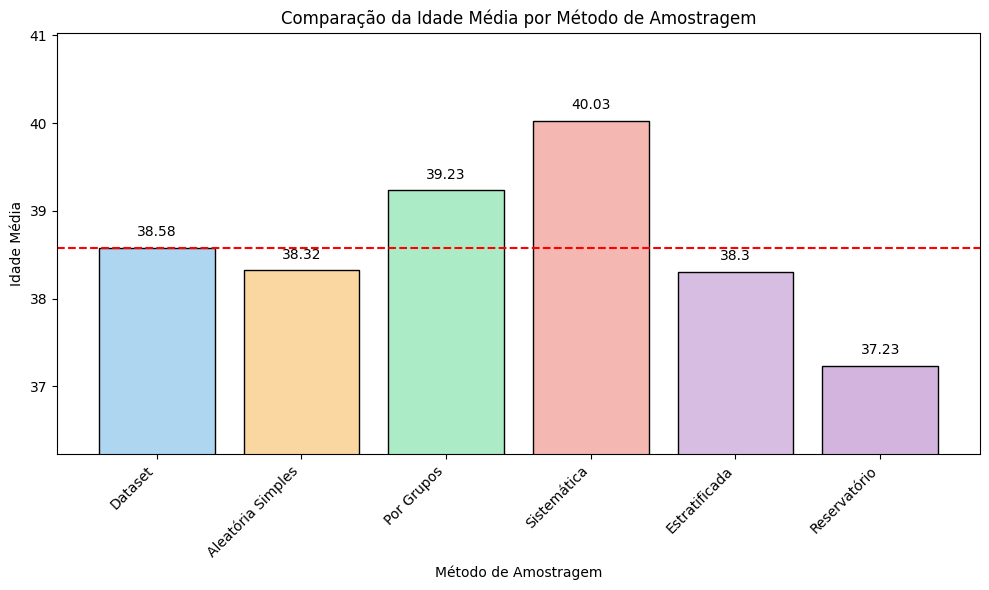

In [29]:
import matplotlib.pyplot as plt

# Dados dos comparativos
metodos_amostragem = ['Dataset', 'Aleatória Simples', 'Por Grupos', 'Sistemática', 'Estratificada', 'Reservatório']
idades_medias = [dataset["age"].mean(),
                 amostra_simples["age"].mean(),
                 amostra_de_grupo["age"].mean(),
                 amostra_sistematica["age"].mean(),
                 amostra_estratificada["age"].mean(),
                 amostra_reservatorio["age"].mean()]

# Criando o gráfico
cores = ['#AED6F1', '#FAD7A0', '#ABEBC6', '#F5B7B1', '#D7BDE2', '#D2B4DE']
plt.figure(figsize=(10, 6))
bars = plt.bar(metodos_amostragem, idades_medias, color=cores,  edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Método de Amostragem')
plt.ylabel('Idade Média')
plt.title('Comparação da Idade Média por Método de Amostragem')

# Adicionando a linha vermelha para a média de idade do dataset
media_dataset = dataset["age"].mean()
plt.axhline(y=media_dataset, color='r', linestyle='--')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Ajustando o intervalo do eixo y
plt.ylim(min(idades_medias) - 1, max(idades_medias) + 1)

# Mostrando o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
